In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
data = pd.read_csv("results.csv")

threads = data['Threads'].unique()
N_values = data[' N'].unique()
data.columns


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a theme for the plots
sns.set_theme(style="whitegrid")

# Create the figure and subplots
num_threads = len(threads)
fig, axes = plt.subplots(
    nrows=(num_threads + 1) // 2, 
    ncols=2, 
    figsize=(12, 5 * ((num_threads + 1) // 2)),
    constrained_layout=True
)

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over threads and generate bar plots
for i, t in enumerate(threads):
    data_t = data[data['Threads'] == t]
    
    # Create a bar plot on the respective subplot
    sns.barplot(
        ax=axes[i],
        x=' N', 
        y=' Speedup', 
        data=data_t, 
        palette=sns.color_palette("viridis", len(data_t[' N']))
    )
    
    # Label axes and add a title
    axes[i].set_xlabel("N values", fontsize=12)
    axes[i].set_ylabel("Speedup", fontsize=12)
    axes[i].set_title(f"Speedup for num_threads = {t}", fontsize=14, weight="bold")
    
    # Format x-ticks in scientific notation
    xticks = data_t[' N']
    xtick_labels = [f"{x:.0e}".replace("e+0", "e") for x in xticks]
    axes[i].set_xticks(range(len(xticks)))
    axes[i].set_xticklabels(xtick_labels, fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()


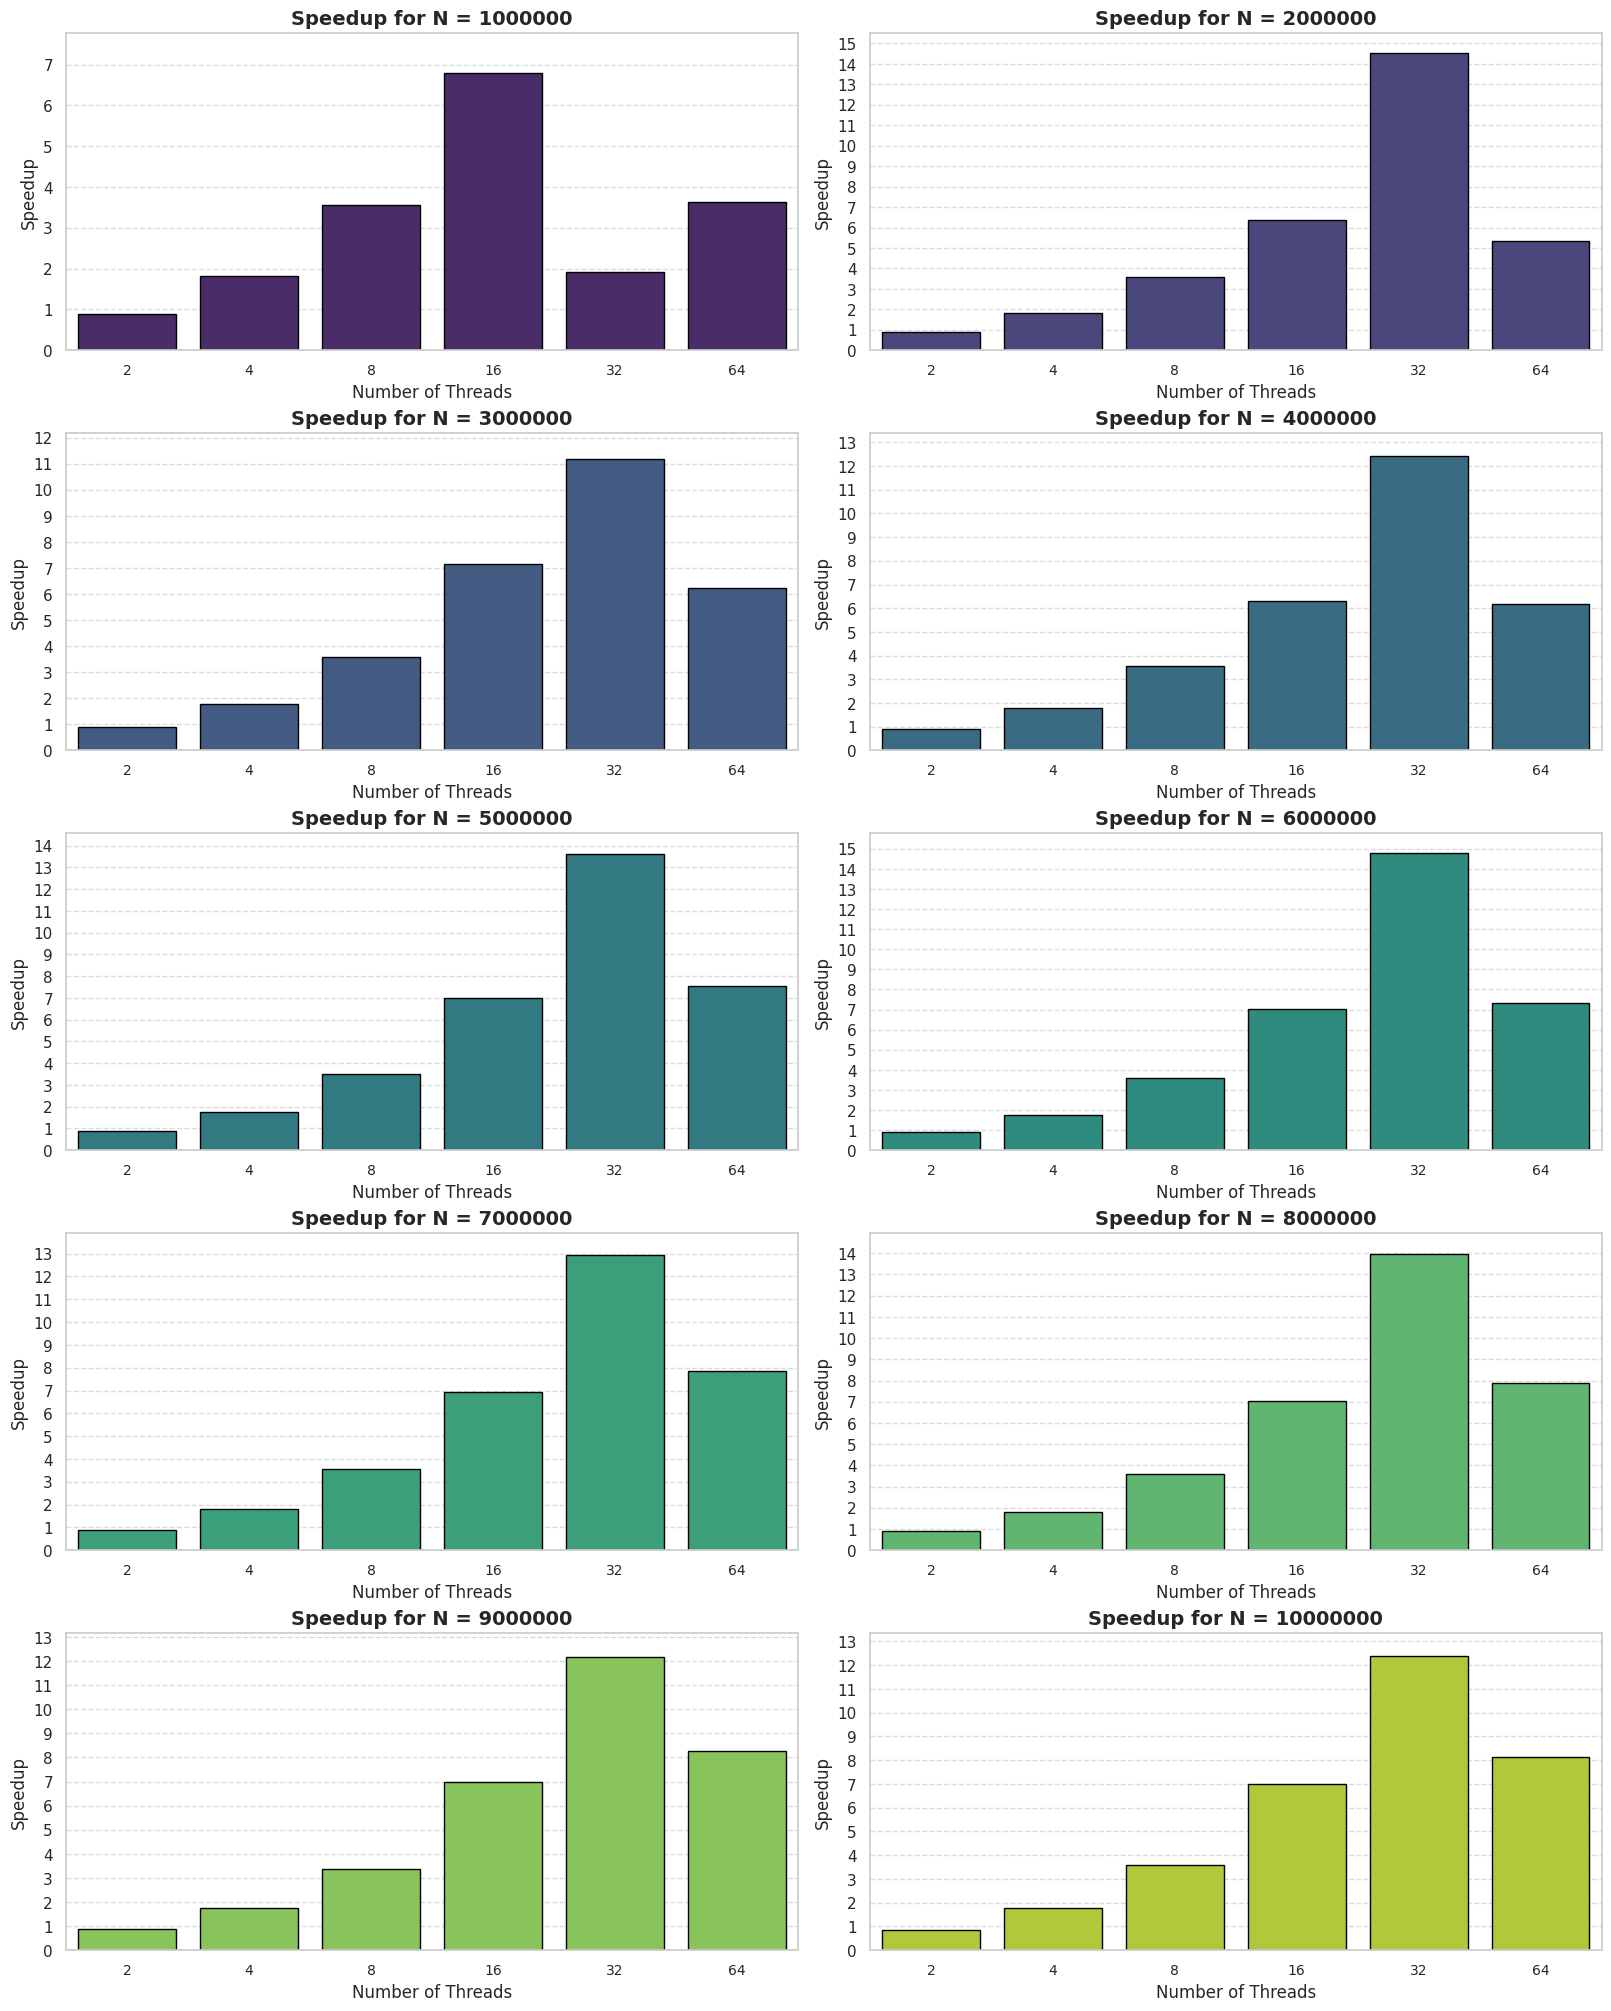

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a theme for the plots
sns.set_theme(style="whitegrid")

# Create the figure and subplots
num_N = len(N_values)
fig, axes = plt.subplots(
    nrows=(num_N + 1) // 2, 
    ncols=2, 
    figsize=(16, 4 * ((num_N + 1) // 2)),
    constrained_layout=True
)

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over N values to create bar plots
for i, N in enumerate(N_values):
    # Filter the data for each N value
    data_N = data[data[' N'] == N]
    
    # Create the bar plot on the respective subplot
    sns.barplot(
        ax=axes[i],
        x='Threads', 
        y=' Speedup', 
        data=data_N, 
        color=sns.color_palette("viridis", len(N_values))[i],
        order=threads,  # Explicitly set thread order
        edgecolor="black"
    )
    
    # Customize the plot with titles and labels
    axes[i].set_xlabel("Number of Threads", fontsize=12)
    axes[i].set_ylabel("Speedup", fontsize=12)
    axes[i].set_title(f"Speedup for N = {N}", fontsize=14, weight='bold')
    
    # Set xticks to match the explicit thread order
    axes[i].set_xticks(range(len(threads)))
    axes[i].set_xticklabels(threads, fontsize=10)
    
    # Adjust y-axis limits for better scaling
    max_speedup = data_N[' Speedup'].max()
    axes[i].set_ylim(0, max_speedup + 1)
    
    # Set y-axis ticks with gaps of 1
    axes[i].set_yticks(range(0, int(max_speedup) + 2, 1))
    
    # Add gridlines for better readability
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()


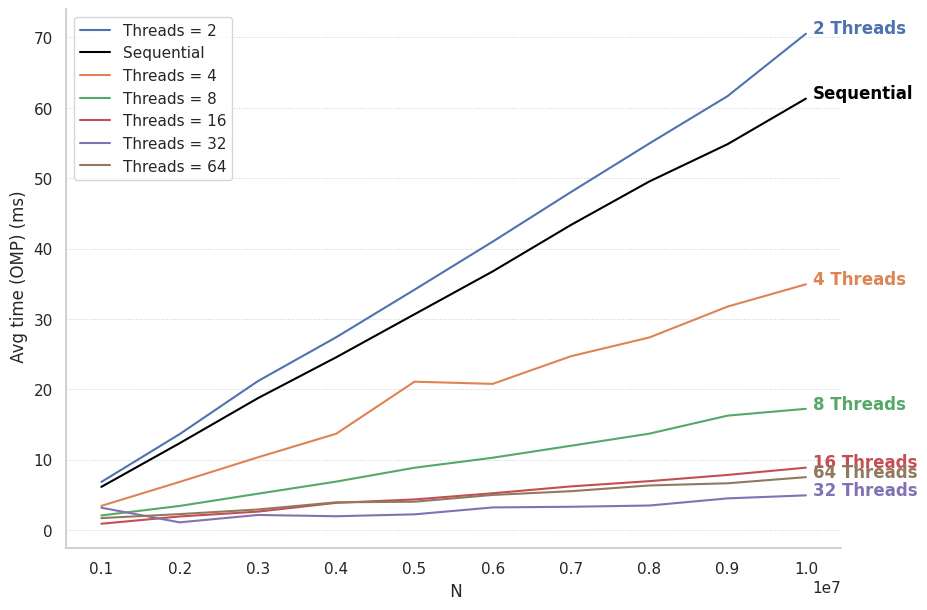

In [37]:
plt.figure(figsize=(10, 7))
for t_Value in data['Threads'].unique():
    data_t = data[data['Threads'] == t_Value]
    line = sns.lineplot(
        data=data_t,
        x=' N',
        y=' Avg time (OMP) (ms)',
        label=f'Threads = {t_Value}'
    )
    # Get the color of the line
    color = line.get_lines()[-1].get_color()
    # Annotate the line with the thread value
    plt.annotate(
        f'{t_Value} Threads',
        xy=(data_t[' N'].values[-1], data_t[' Avg time (OMP) (ms)'].values[-1]),
        xytext=(5, 0),
        textcoords='offset points',
        horizontalalignment='left',
        size='medium',
        color=color,
        weight='semibold'
    )

    if t_Value == 2:
        line = sns.lineplot(
            data=data_t,
            x=' N',
            y=' Avg time (Seq) (ms)',
            color= 'black',
            label=f'Sequential'
            )
        plt.annotate(
            f'Sequential',
            xy=(data_t[' N'].values[-1], data_t[' Avg time (Seq) (ms)'].values[-1]),
            xytext=(5, 0),
            textcoords='offset points',
            horizontalalignment='left',
            size='medium',
            color='black',
            weight='semibold'
        )


plt.xticks(data[' N'].unique())
plt.grid(axis='y', linestyle=':', linewidth=0.7)  # Add horizontal dotted gridlines
plt.grid(axis='x', visible=False)  # Remove vertical gridlines
plt.gca().spines['top'].set_visible(False)  # Remove top box bar
plt.gca().spines['right'].set_visible(False)  # Remove right box bar
plt.show()

In [8]:
data.columns

Index(['Threads', ' N', ' Avg time (Seq) (ms)', ' Avg time (OMP) (ms)',
       ' Speedup'],
      dtype='object')